In [1]:
# Kaloume thn vivliothhkh modsim h opoia tha mas vohthisei sthn prosomoiwsh tis askisis.

from modsim import *

In [2]:
# bike_to_town_XY: Sinartisi pou kaloume otan theloume na metakinisoume ena podilato apo tin polh X stin poli Y.

def bike_to_town_AB(state):
    
    # elexgoume ean stin polh apo tin opoia ksekinaei mia metakinisi iparxei diathesimo podilato.
    # epishs apotrepei periptwseis opou o algorithmos emfanize arnhtikes times sto plithos ton podilatwn kata thn prosomoiwsh merikes fores.
    if state.town_A == 0:
        
        # metrame tis fores pou zitithike podilato apo enan mathith kai den ipirxe diathesimo.
        state.town_A_empty += 1
        
        # se periptosi pou den iparxei diathesimo podilato vgainoume apo tin sinartisi xoris na kanoume opoiadipote allh energeia.      
        return
    
    # afairoume ena podilato apo tin polh pou ksekinaei i metakinisi.    
    state.town_A -= 1
    
    # prosthetoume ena podilato stin polh pou katligei i metakinisi.    
    state.town_B += 1
    
#omoios leitourgoun kai oi upoloipes pente sunartiseis gia tis antistoixes metakinisis pou parousiazontai parakatw. 

def bike_to_town_AC(state):
    if state.town_A == 0:
        state.town_A_empty += 1
        return
    state.town_A -= 1
    state.town_C += 1 
    
    
def bike_to_town_BA(state):
    if state.town_B == 0:
        state.town_B_empty += 1
        return
    state.town_B -= 1
    state.town_A += 1
    
       
def bike_to_town_BC(state):
    if state.town_B == 0:
        state.town_B_empty += 1
        return
    state.town_B -= 1
    state.town_C += 1
    
    
def bike_to_town_CA(state):
    if state.town_C == 0:
        state.town_C_empty += 1
        return
    state.town_C -= 1
    state.town_A +=1 

    
def bike_to_town_CB(state):
    if state.town_C == 0:
        state.town_C_empty += 1
        return
    state.town_C -= 1
    state.town_B += 1

In [3]:
# pXY orizoume tin pithanotita na pragmatopoihthi mia metakinisi podilatou apo tin poli X stin poli Y.
# Xrisimopoioume tin sinartisi step gia na kanoume prosomoiosi ena time step. 
# Stin periptosi mas to time interval einai 1 lepto sumfona kai me to vivlio tou mathimatos.

def step(state , pAB , pAC , pBA , pBC , pCA , pCB):
    
    # Xrisimopoioume tin sunartisi flip gia na elegksoume ean einai True/False mia metakinisi podilatou apo tin poli X stin poli Y
    if flip (pAB):
        
        # Ean i flip einai true tha ektelesoume tin sinartisi gia tin metakinisi enos podilatou apo tin poli X stin poli Y
        bike_to_town_AB(state)
        
        # Se periptosi pou i flip einai True, ektipono tin metakinisi apo tin poli X stin poli Y, oste kathe fora sto telos na gnorizoume oles tis diadromes pou pragmatopoihtkikan
        print('Moving a bike to B from town A ')
        
    # Omoios leitourgoun kai oi upoloipes pente periptwseis pou parousiazontai parakato kai antisoixoun stis opoloipes pithanes diadromes.
    
    if flip (pAC):
        bike_to_town_AC(state)
        print('Moving a bike to C from town A ')

    if flip (pBA):
        bike_to_town_BA(state)
        print('Moving a bike to A from town B ')

    if flip (pBC):
        bike_to_town_BC(state)
        print('Moving a bike to C from town B ')

    if flip (pCA):
        bike_to_town_CA(state)
        print('Moving a bike to A from town C ')

    if flip (pCB):
        bike_to_town_CB(state)
        print('Moving a bike to B from town C ')

In [4]:
# Sinartisi pou tha kaloume otan theloume na pragmatopoihsoume prosomoiwsis.
# State einai oi sinthikes pou xrisimopoioume gia tin arxikopoiisi tou sistimatos mas.

def run_simulation(state , pAB , pAC , pBA , pBC , pCA , pCB):
    
    # Tha xrisimopoiisoume tin results_X os TimeSeries gia na apothikevoume kata tin diarkeia tou simulation ton arithmo ton diathesimon podilaton stin poli X
    results_A = TimeSeries()
    results_B = TimeSeries()
    results_C = TimeSeries()
    
    # Tha xrisimopoiisoume tin results_X_empty os TimeSeries gia na apothikevoume kata tin diarkeia tis prosomoiosis ton arithmo ton foron pou zitithike podilato stin poli X, 
    # Alla den ipirxe diathesimo ekeini tin stigmi
    results_A_empty = TimeSeries()
    results_B_empty = TimeSeries()
    results_C_empty = TimeSeries()

    # Xrisimopoioume ena for loop gia na treksoume to sistima mas gia 60 epanalipseis. kathe epanalipsi antistoixi se 1 lepto
    for i in range(60):
        
        # Kaloume tin sinartisi step gia na elegksoume ti metakiniseis podilaton zitountai se kathe epanalipsi
        step (state ,pAB , pAC , pBA , pBC , pCA , pCB)
        
        # Tha xrisimopoiisoume tin results_X os TimeSeries gia na apothikevoume kata tin diarkeia tou simulation ton arithmo ton diathesimon podilaton stin poli X
        results_A[i] = state.town_A
        results_B[i] = state.town_B
        results_C[i] = state.town_C
        
        # Tha xrisimopoiisoume tin results_X_empty os TimeSeries gia na apothikevoume kata tin diarkeia tou simulation ton arithmo ton foron pou zitithike podilato stin poli X, 
        # alla den ipirxe kapoia diathesimo 
        results_A_empty[i] = state.town_A_empty
        results_B_empty[i] = state.town_B_empty
        results_C_empty[i] = state.town_C_empty
        
    # To proto grafhma antistoixei sto proto erwthma ths askhshs mas.
    # Dimiourgoume ena grafima pou deixnei to plithos ton diathesimon podilaton se kathe poli ana lepto to opoio antistixi sto proto erotima tis askisis mas.
    # Paratiroume oti to plithos ton podilaton gia t=0 sec antistoixoun stis times pou exoume arxikopoiisei to sistima mas sumfona me tin askisi.
    
    plot1 = plt.figure(1, figsize=(15,10))
    plt.plot(results_A, label='Plithos podhlatwn sthn polh A ')
    plt.plot(results_B, label='Plithos podhlatwn sthn polh B ')
    plt.plot(results_C, label='Plithos podhlatwn sthn polh C ')
    plt.legend(loc="upper left")
    
    # I decorate periexei ton titlo kai tis onomasies ton aksonon gia to proto grafima tis askisis.
    
    decorate( title = 'To plithos twn podhlatwn pou uparxei se kathe polh ', 
               xlabel = 'Xronikh diarkeia (min)', ylabel = 'Plithos podhlatwn')
    
    # Ektiponi to proto grafima tis askisis.
   
    print('\n')
    print('To grafima tou protou erotimatos tis askisis')
    plt.show(decorate)
    
    
    
    # To deutero grafhma antistoixei sto deutero erwthma ths askhshs mas.
    # Dimiourgoume ena grafima pou deixnei to plithos ton periptoseon opou zitithike podilato se mia poli, alla den ipirxe diathesimo ekeini tin stigmi,
    # to opoio antistixi sto deutero erotima tis askisis mas.
    # Paratiroume oti gia t=0 sec i times gia kathe poli einai miden opos akrivos exoume arxikopoiisei to sistima mas parakato.
    
    plot2 = plt.figure(2 , figsize=(15,10) )
    plt.plot(results_A_empty, label = 'Elleipsh podhalatwn sthn polh A')
    plt.plot(results_B_empty, label = 'Elleipsh podhalatwn sthn polh B')
    plt.plot(results_C_empty, label = 'Elleipsh podhalatwn sthn polh C')
    plt.legend(loc="upper left")

    # I decorate periexei ton titlo kai tis onomasies ton aksonon gia to deutero grafima tis askisis.
    
    decorate ( title = 'To plithos twn periptoseon opou zhtithike podhlato alla den uphrxe diathesimo', 
                xlabel = 'Xronikh diarkeia (min)', ylabel = 'Plithos periptwsewn' )
    
    # Ektiponi to deutero grafima tis askisis
   
    print('\n')
    print('To grafima tou deuterou erotimatos tis askisis')
    plt.show(decorate)
    
    # Meta to telos tou simulation ektiponoume ton arithmo ton foron pou zitithike podilato se kathe poli, alla den ipirxe diathesimo ekeini tin stigmh.
    
    print('\n Parakatw parousiazontai i apantisis gia to deutero erwthma ths askhshs \n')
    
    print('\n Oi fores pou zithike podhlato apo thn polh A alla den uphrxe diathesimo einai : \n')
    print(bikeshare.town_A_empty)
    
    print('\n Oi fores pou zithike podhlato apo thn polh B alla den uphrxe diathesimo einai : \n')
    print(bikeshare.town_B_empty)
    
    print('\n Oi fores pou zithike podhlato apo thn polh C alla den uphrxe diathesimo einai : \n')
    print(bikeshare.town_C_empty)
    

In [5]:
# Prin apo kathe fora pou theloume na kanoume prosomoiosi einai aparaitito na trexoume ton parakato kodika gia na arxikopoiei to arxiko state me ta swsta dedomena 
# kai tis sostes arxikes times, eidallws kathe fora ta nea dedomena tha prostithontai sta palia me apotelesma na kataligoume se lathos apotelsemata eno o kodikas einai sostos.

bikeshare = State ( town_A = 7 , town_B = 6 , town_C = 5, town_A_empty = 0 , town_B_empty = 0 , town_C_empty = 0 )

Moving a bike to B from town A 
Moving a bike to A from town C 
Moving a bike to B from town A 
Moving a bike to C from town B 
Moving a bike to A from town C 
Moving a bike to A from town B 
Moving a bike to C from town A 
Moving a bike to B from town C 
Moving a bike to C from town A 
Moving a bike to A from town C 
Moving a bike to A from town B 
Moving a bike to C from town A 
Moving a bike to A from town B 
Moving a bike to B from town C 
Moving a bike to C from town B 
Moving a bike to B from town C 
Moving a bike to B from town A 
Moving a bike to A from town C 
Moving a bike to B from town C 
Moving a bike to B from town A 
Moving a bike to C from town B 
Moving a bike to B from town A 
Moving a bike to C from town A 
Moving a bike to A from town B 
Moving a bike to C from town B 
Moving a bike to A from town C 
Moving a bike to A from town C 
Moving a bike to B from town A 
Moving a bike to B from town A 
Moving a bike to A from town C 
Moving a bike to A from town B 
Moving a

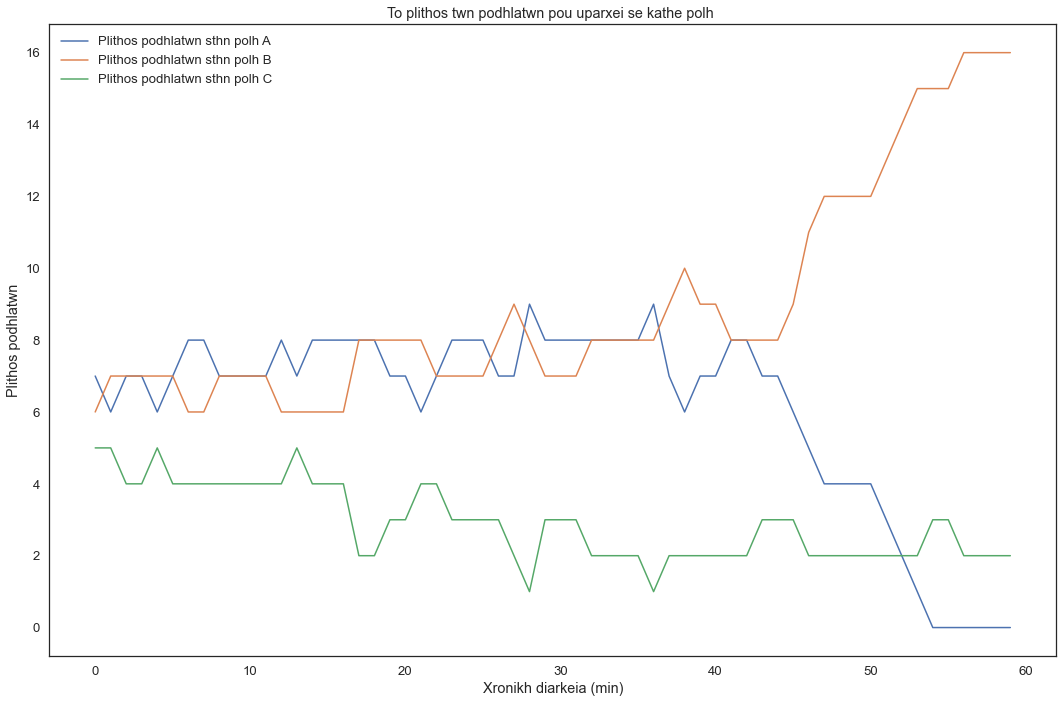



To grafima tou deuterou erotimatos tis askisis


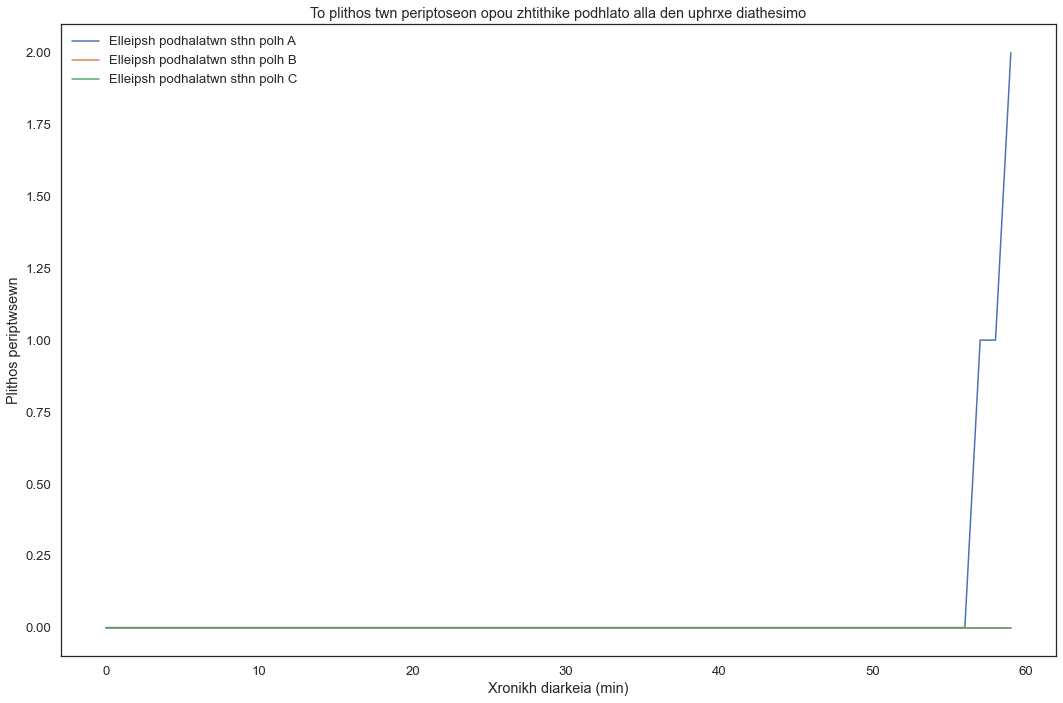


 Parakatw parousiazontai i apantisis gia to deutero erwthma ths askhshs 


 Oi fores pou zithike podhlato apo thn polh A alla den uphrxe diathesimo einai : 

2

 Oi fores pou zithike podhlato apo thn polh B alla den uphrxe diathesimo einai : 

0

 Oi fores pou zithike podhlato apo thn polh C alla den uphrxe diathesimo einai : 

0


In [6]:
# Kaloume thn sunarthsh run_simulation kai analoga tis pithanothtes gia kathe mia apo tis 6 diadromes mas apodidei kai ta antistoixa apotelesmata (True/False).
# Wstoso epeidh xrhsimopoioume thn sunarthsh flip gia tis idies arxikes times, se kathe prosomoiwsh tha exoume diaforetika apotelesmata parolou pou den exoume allaksei ta dedomena.
# To athroisma olwn twn pithatnothtwn tha prepei na isoutai me arithmo mikrotero i iso apo to ena se kathe prosomoiwsh opws einai gnwsto apo ta mathimatika.
# Oi parakato pithanotites einai tuxaies

run_simulation(bikeshare , 0.25 , 0.15 , 0.15 , 0.1 , 0.15 , 0.2 )